In [1]:
import numpy as np
import matplotlib.pyplot as plt
from params import Params
from ktnsrm.SpecRepMethod import SRM

In [2]:
from Kamai import Kamai

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
params = Params()

### the Kamai spectrum
- presume sigma_1 is known
- V_hub is known
- L_k is L1

$$
S = \frac{4 \sigma_{1}^2 \frac{L_{k}}{V_{hub}}}{(1 + 6 f \frac{L_{k}}{V_{hub}})^{5/3}}
$$

In [5]:
kamai_spec = Kamai(V_hub = params.V_ref, sigma_1=1, z=params.z_hub)

In [6]:
psd = kamai_spec.get_spectrum()

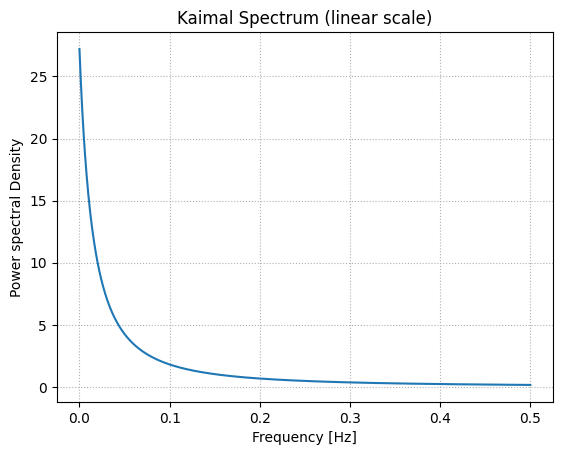

In [7]:
kamai_spec.plot_spectrum(S_f=psd)

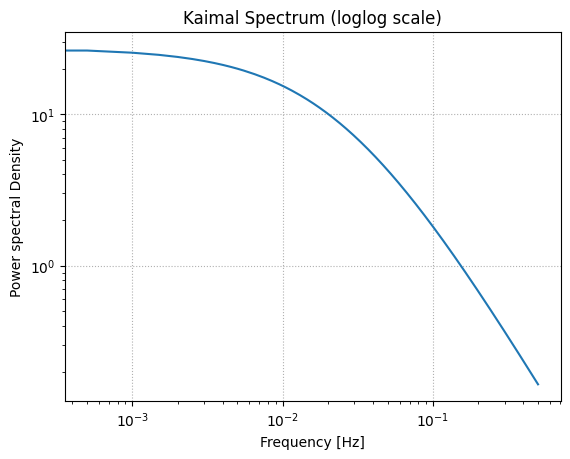

In [8]:
kamai_spec.plot_spectrum(S_f=psd, style='log')

In [9]:
# instantiate the simulation object
simulation_obj = SRM(wu=2*2*np.pi, N1=1000, fs=1000, duration=200)

In [10]:
simulation_amp = simulation_obj._SpecRepsentation0(psd, plotting=False)

the lower limit of sampling frequency: 4
the length of the simulation (200000,)


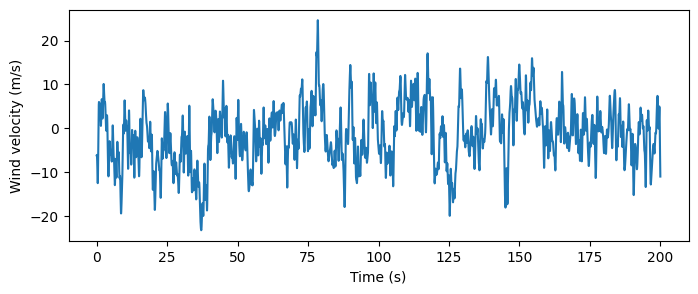

In [11]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(simulation_obj.t_axis_4simu, simulation_amp)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Wind velocity (m/s)')
# ax.set_ylim([-80, 80])
plt.show()